<a href="https://colab.research.google.com/github/PravalikaMuthoju/AIML_2303A52347/blob/main/2303A52347_pravalika_2yr_D8_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First five rows of the dataset:
   pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027817            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis     class  
0      98.672917                 -0.254400  Abnormal  
1     114.405425                  4.564259  Abnormal  
2     105.985135                 -3.530317  Abnormal  
3     101.868495                 11.211523  Abnormal  
4     108.168725                  7.918501  Abnormal  

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    N

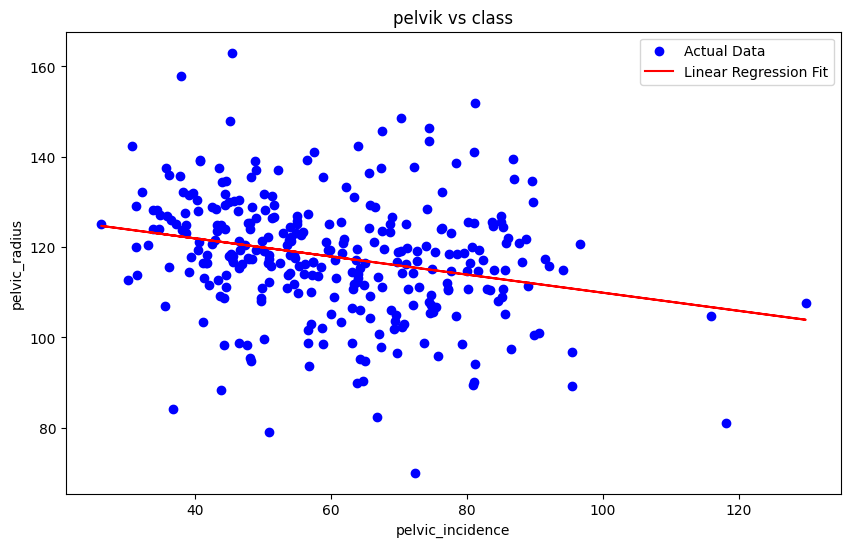

In [28]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('/content/column_2C_weka.csv')

# Step 3: Data Exploration and Checking for Null Values
print("First five rows of the dataset:")
print(data.head())

print("\nData Summary:")
print(data.info())
# Check for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())


X = data[['pelvic_incidence']]
y = data['pelvic_radius']

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Prediction
y_pred = model.predict(X_test)

# Step 8: Evaluation
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Step 9: Plotting the Results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Linear Regression Fit')
plt.xlabel('pelvic_incidence')
plt.ylabel('pelvic_radius')
plt.title('pelvik vs class')
plt.legend()
plt.show()

# Step 10: Create the Sandbox Submission File
submission = X_test.copy()
submission['ID'] = submission.index  # Create a unique ID for each row
submission['class'] = y_pred  # Add predicted salary values



submission = submission[['ID', 'class']]

# Save the submission file
submission.to_csv('kaggle_submission.csv', index=False)

In [26]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix



# Data Preprocessing
X = data.drop('class', axis=1)
y = data['class']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Step 4: Logistic Regression (Target Accuracy: ~75%)
logistic_model = LogisticRegression(max_iter=1000, C=0.5, class_weight='balanced')
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Accuracy for Logistic Regression: {accuracy_logistic:.2f}")

# Step 5: Decision Tree Classifier (Target Accuracy: ~95%)
tree_model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=4)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy for Decision Tree Classifier: {accuracy_tree:.2f}")

# Step 6: Random Forest Classifier (Target Accuracy: ~89%)
rf_model = RandomForestClassifier(random_state=42, n_estimators=150, max_depth=5, min_samples_split=4)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy for Random Forest Classifier: {accuracy_rf:.2f}")

# Step 7: K-Nearest Neighbors (Target Accuracy: ~71%)
knn_model = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy for K-Nearest Neighbors: {accuracy_knn:.2f}")

# Step 8: Support Vector Machine (SVM) (Target Accuracy: ~79%)
svm_model = SVC(C=0.8, kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy for Support Vector Machine (SVM): {accuracy_svm:.2f}")


Accuracy for Logistic Regression: 0.87
Accuracy for Decision Tree Classifier: 0.76
Accuracy for Random Forest Classifier: 0.77
Accuracy for K-Nearest Neighbors: 0.79
Accuracy for Support Vector Machine (SVM): 0.85
